In [15]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import os
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import * 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as k


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
data = pd.read_csv('/content/drive/MyDrive/376_project/_labels.csv', dtype=str)
data.id = data.id + '.tif'
print(data.shape)
data.head

(220025, 2)


<bound method NDFrame.head of                                                   id label
0       f38a6374c348f90b587e046aac6079959adf3835.tif     0
1       c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif     1
2       755db6279dae599ebb4d39a9123cce439965282d.tif     0
3       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif     0
4       068aba587a4950175d04c680d38943fd488d6a9d.tif     0
...                                              ...   ...
220020  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6.tif     0
220021  d4b854fe38b07fe2831ad73892b3cec877689576.tif     1
220022  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75.tif     0
220023  f129691c13433f66e1e0671ff1fe80944816f5a2.tif     0
220024  a81f84895ddcd522302ddf34be02eb1b3e5af1cb.tif     1

[220025 rows x 2 columns]>

In [ ]:
train, val_test = train_test_split(data, train_size=0.9)
val, test = train_test_split(val_test, train_size=0.5)
print(train.shape)
print(val.shape)
print(test.shape)

(198022, 2)
(11001, 2)
(11002, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,
                                   dtype=tf.float32)
validation_datagen = ImageDataGenerator(rescale=1/255,
                                   dtype=tf.float32)
test_datagen = ImageDataGenerator(rescale=1/255,
                                   dtype=tf.float32)

In [ ]:
train_path = '/content/drive/MyDrive/376_project/data_small'

In [ ]:
BATCH_SIZE = 64

train_loader = train_datagen.flow_from_dataframe(
    dataframe = train,
    directory = train_path,
    x_col = 'id',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (96,96)
)

valid_loader = validation_datagen.flow_from_dataframe(
    dataframe = val,
    directory = train_path,
    x_col = 'id',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (96,96)
)

test_loader = train_datagen.flow_from_dataframe(
    dataframe = test,
    directory = train_path,
    x_col = 'id',
    y_col = 'label',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (96,96)
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 191919 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 6103 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10658 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 343 validated image filenames belonging to 2 classes.
Found 317 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10685 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0

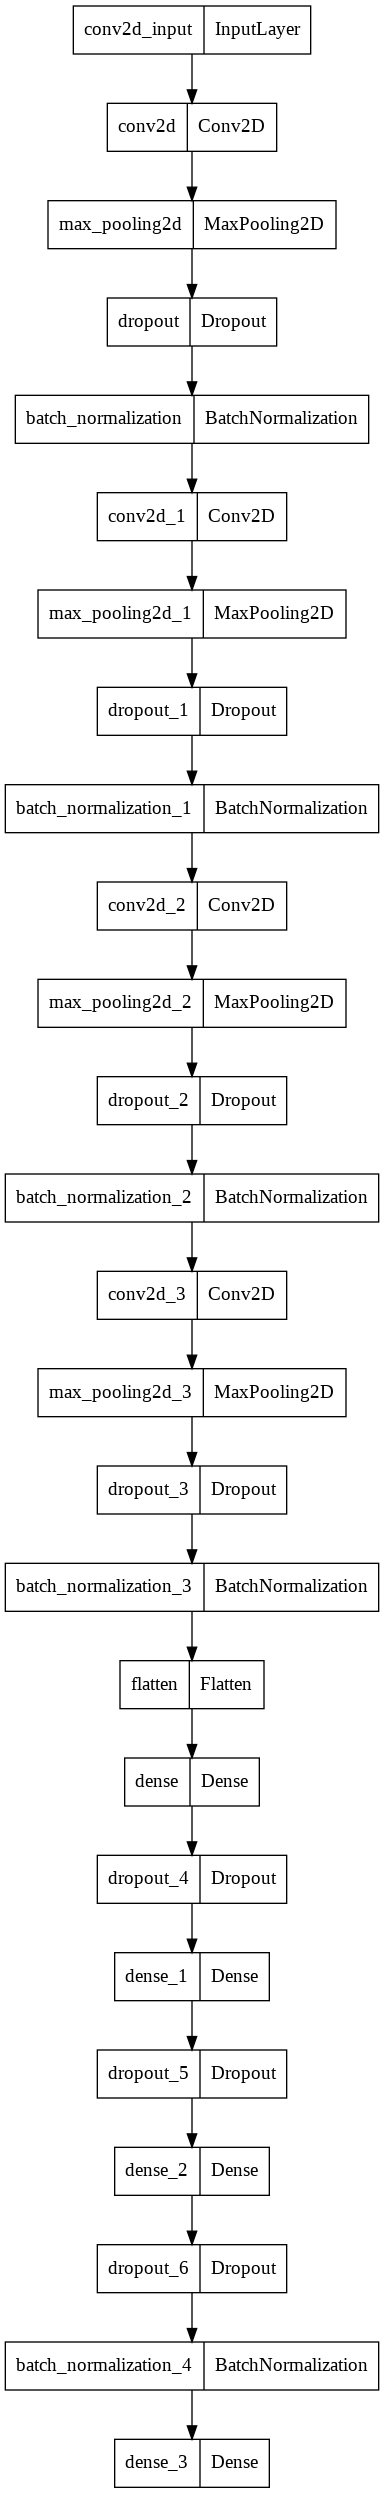

In [17]:
np.random.seed(1)
tf.random.set_seed(1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',input_shape=(96,96,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy', tf.keras.metrics.AUC()])
TR_STEPS = len(train_loader)
VA_STEPS = len(valid_loader)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/376_project/base/',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
h1 = model.fit(
    x = train_loader, 
    steps_per_epoch = TR_STEPS, 
    epochs = 10,
    validation_data = valid_loader, 
    validation_steps = VA_STEPS, 
    verbose = 1,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/10
96/96 [==============================] - 358s 3s/step - loss: 0.6463 - accuracy: 0.6749 - auc_1: 0.7267 - val_loss: 3.5271 - val_accuracy: 0.4169 - val_auc_1: 0.4755
Epoch 2/10
96/96 [==============================] - 25s 263ms/step - loss: 0.5338 - accuracy: 0.7572 - auc_1: 0.8210 - val_loss: 4.5312 - val_accuracy: 0.4169 - val_auc_1: 0.4266
Epoch 3/10
96/96 [==============================] - 24s 251ms/step - loss: 0.4891 - accuracy: 0.7873 - auc_1: 0.8535 - val_loss: 4.3333 - val_accuracy: 0.4286 - val_auc_1: 0.4752
Epoch 4/10
96/96 [==============================] - 24s 253ms/step - loss: 0.4641 - accuracy: 0.8008 - auc_1: 0.8673 - val_loss: 3.3857 - val_accuracy: 0.4519 - val_auc_1: 0.5085
Epoch 5/10
96/96 [==============================] - 26s 275ms/step - loss: 0.4412 - accuracy: 0.8127 - auc_1: 0.8802 - val_loss: 0.7062 - val_accuracy: 0.7493 - val_auc_1: 0.7936
Epoch 6/10
96/96 [==============================] - 25s 260ms/step - loss: 0.4340 - accuracy: 0.8214 - auc_

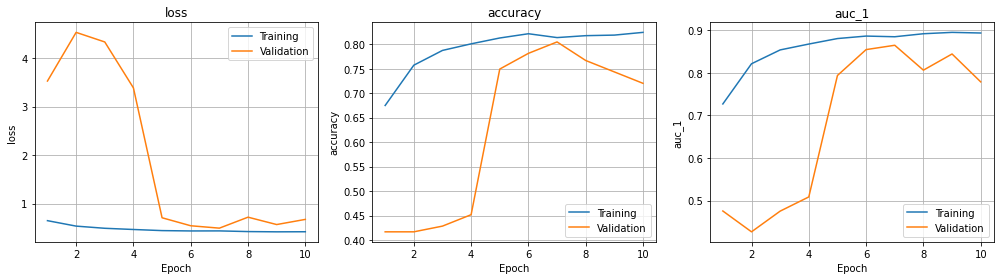

In [ ]:
def merge_history(hlist):
    history = {}
    for k in hlist[0].history.keys():
        history[k] = sum([h.history[k] for h in hlist], [])
    return history

def vis_training(h, start=1):
    epoch_range = range(start, len(h['loss'])+1)
    s = slice(start-1, None)

    plt.figure(figsize=[14,4])

    n = int(len(h.keys()) / 2)

    for i in range(n):
        k = list(h.keys())[i]
        plt.subplot(1,n,i+1)
        plt.plot(epoch_range, h[k][s], label='Training')
        plt.plot(epoch_range, h['val_' + k][s], label='Validation')
        plt.xlabel('Epoch'); plt.ylabel(k); plt.title(k)
        plt.grid()
        plt.legend()

    plt.tight_layout()
    plt.show()


history = merge_history([h1])
vis_training(history)

In [ ]:
loss, accuracy, auc_1 = model.evaluate(test_loader)
print(accuracy)

5/5 [==============================] - 1s 222ms/step - loss: 0.6268 - accuracy: 0.7256 - auc_1: 0.7942
0.7255520224571228


In [ ]:
print(model.metrics_names)

['loss', 'accuracy', 'auc_1']


In [ ]:
model.save('/content/drive/MyDrive/376_project/base/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/376_project/base/model/assets
